In [1]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())

2.14.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images =  train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/ 255.0


train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [4]:
test_images.shape

(10000, 32, 32, 3)

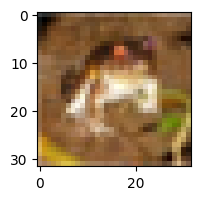

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0])

plt.show()

In [6]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [7]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [8]:
history_obj = tf.keras.callbacks.History()

model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[history_obj]
)

Epoch 1/10
1563/1563 [==============================] - 27s 9ms/step - loss: 1.5723 - accuracy: 0.4193 - val_loss: 1.2065 - val_accuracy: 0.5669
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1165 - accuracy: 0.6062 - val_loss: 0.9034 - val_accuracy: 0.6818
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9238 - accuracy: 0.6752 - val_loss: 0.8130 - val_accuracy: 0.7159
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8274 - accuracy: 0.7120 - val_loss: 0.7277 - val_accuracy: 0.7508
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7547 - accuracy: 0.7377 - val_loss: 0.7225 - val_accuracy: 0.7581
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7044 - accuracy: 0.7567 - val_loss: 0.6808 - val_accuracy: 0.7693
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6678 - accuracy: 0.7667 - val_loss: 0.6918 - val_ac

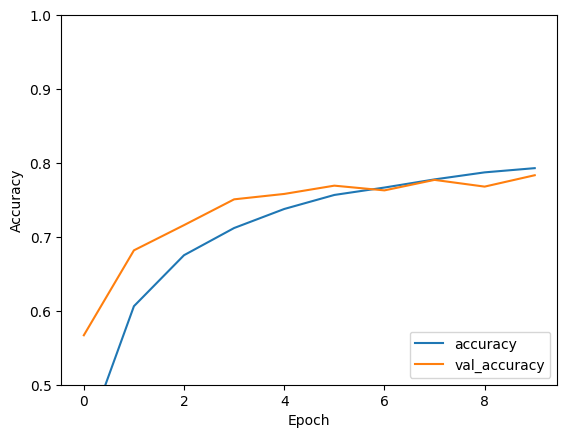

In [9]:
plt.plot(history_obj.history['accuracy'], label='accuracy')
plt.plot(history_obj.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.6388 - accuracy: 0.7834 - 1s/epoch - 4ms/step
